# Assignment 5 -Multi Linear Regration(toyototcorolla)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [16]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding ="iso-8859-1") 
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
car = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
car

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [19]:
car.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [20]:
car.corr()   #Correlation

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [21]:
car.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


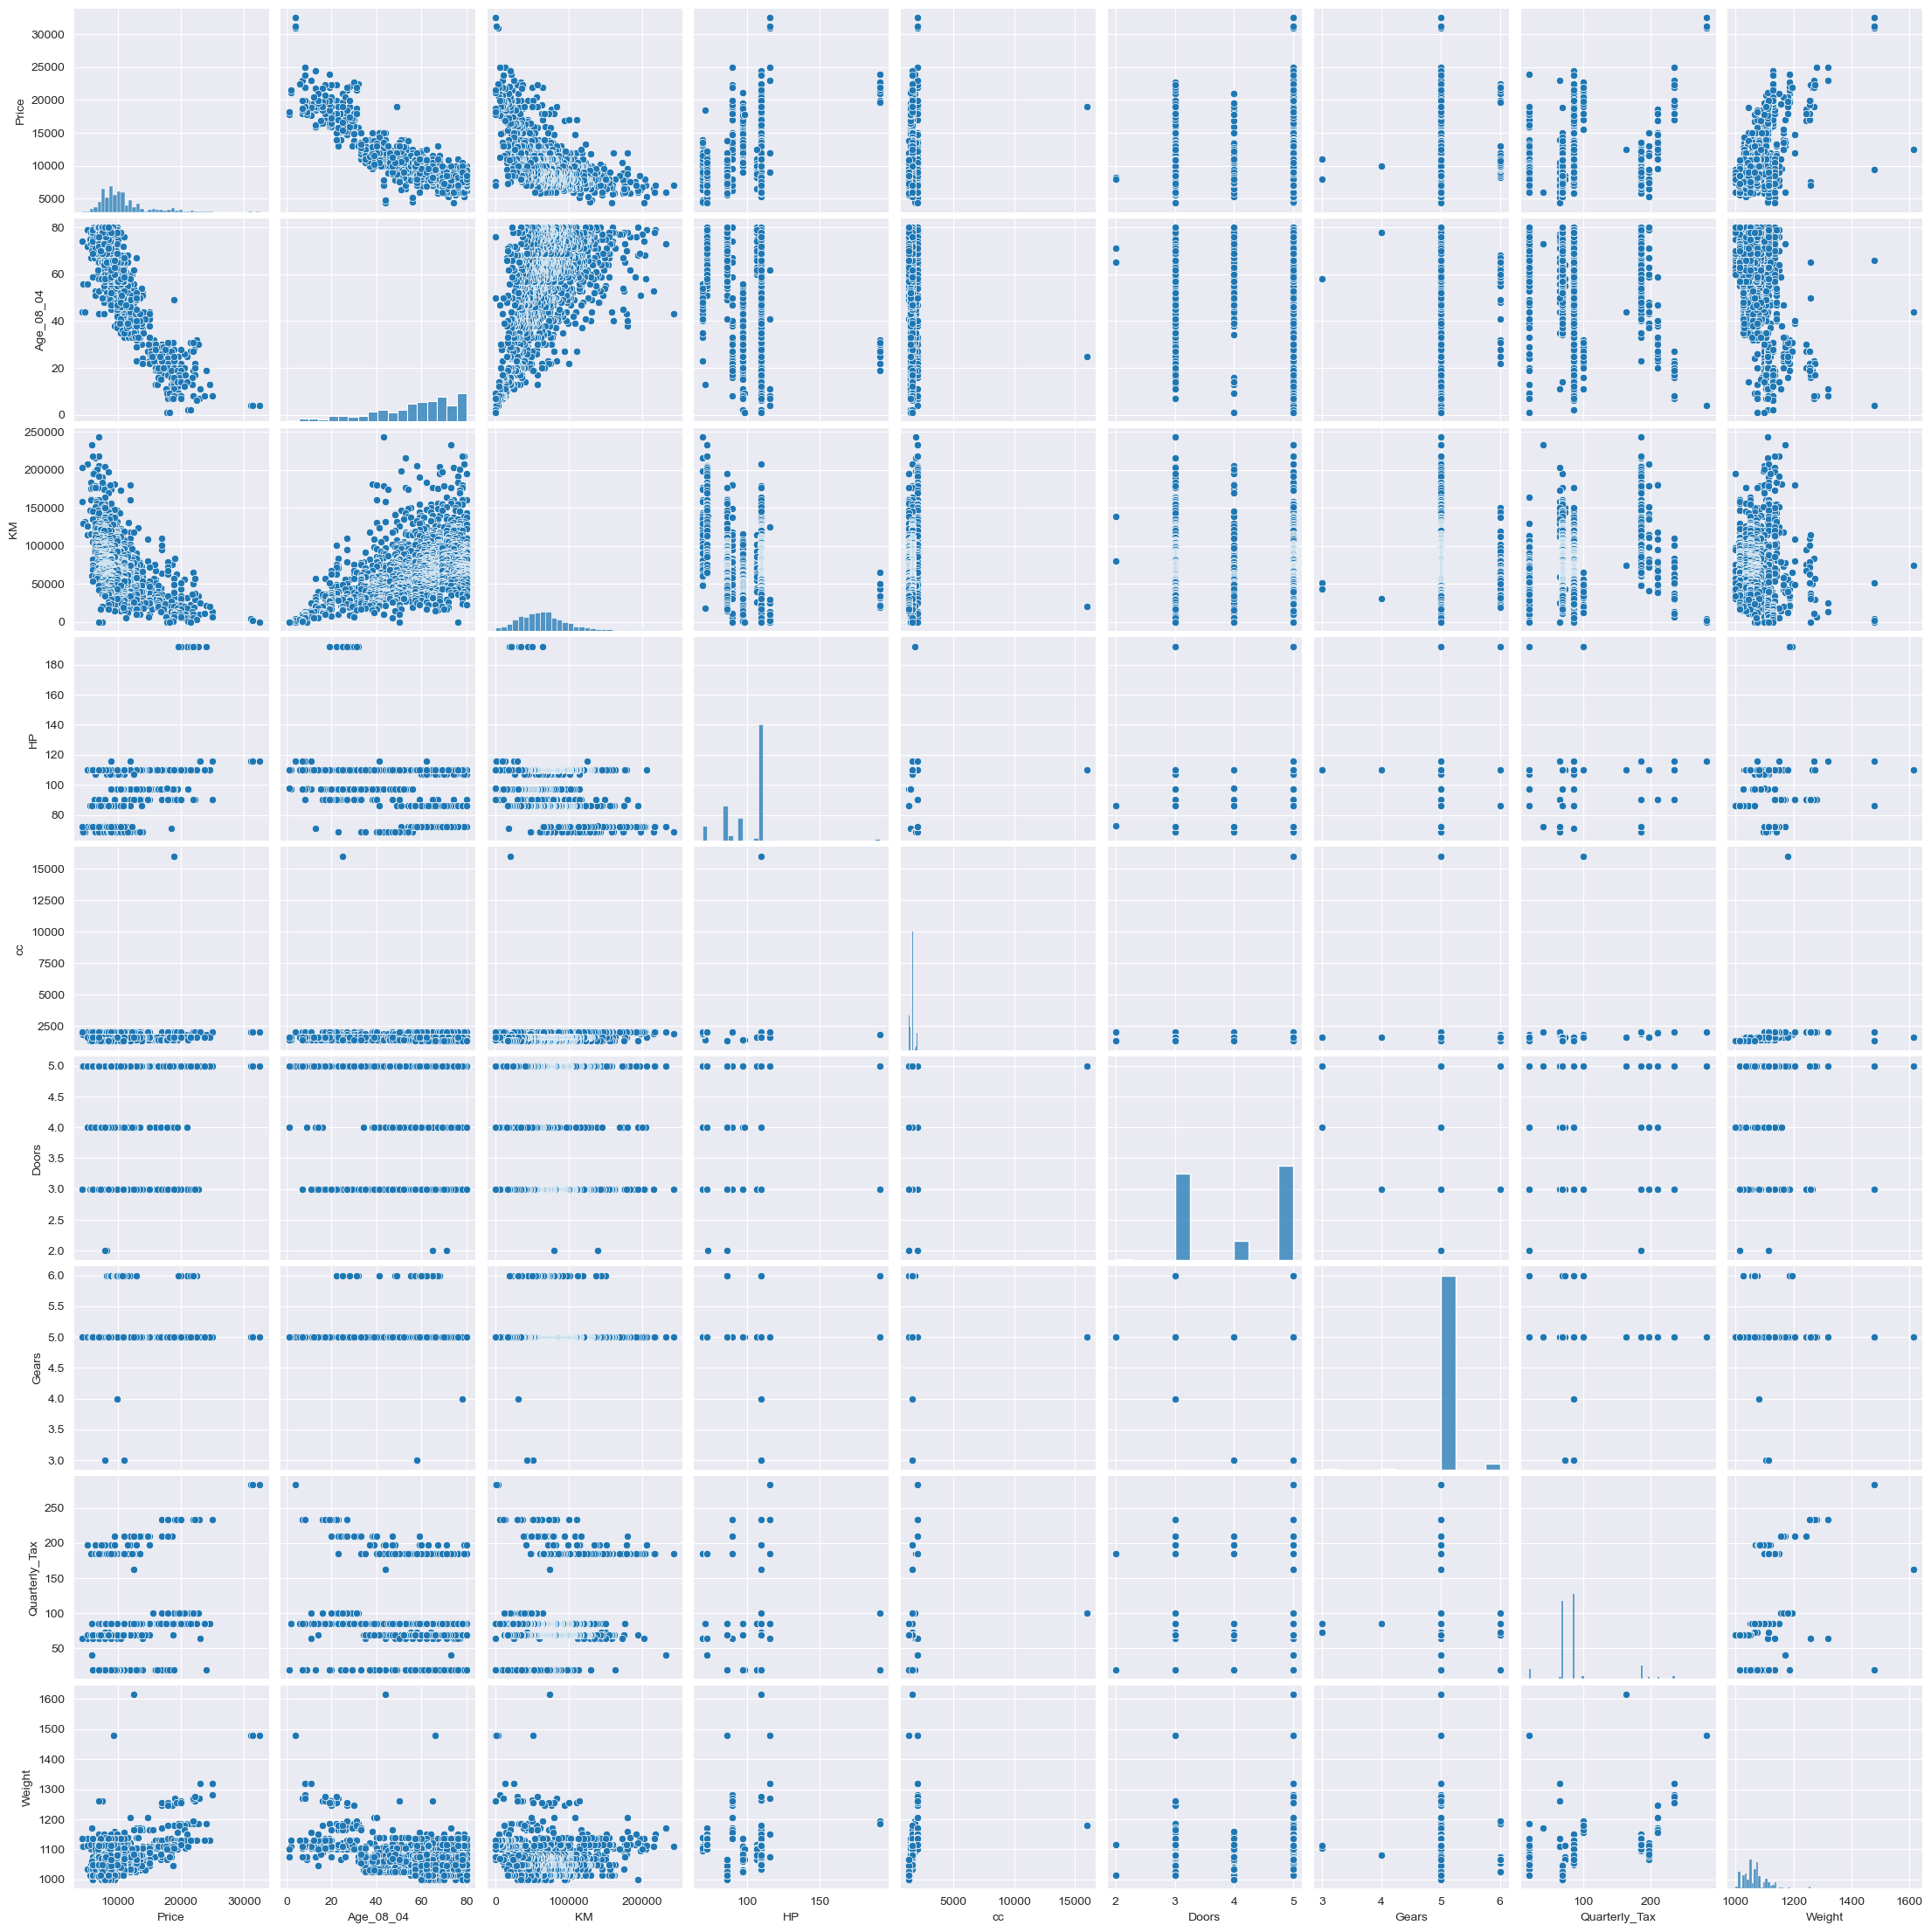

In [22]:
sns.set_style(style='darkgrid')  #Pair plot
sns.pairplot(car)

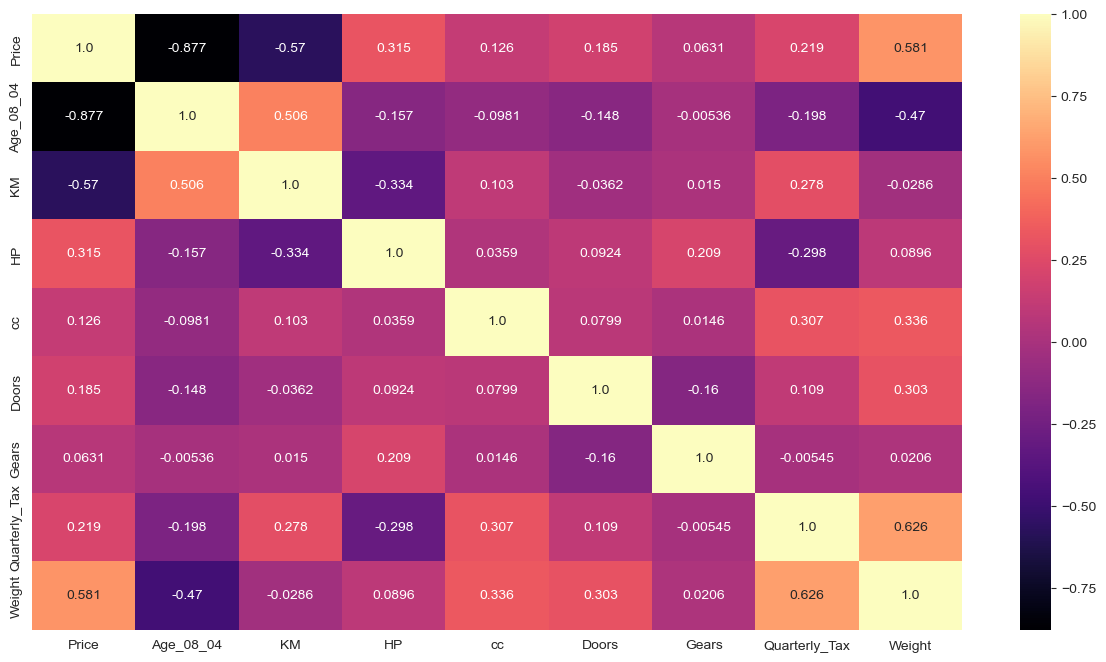

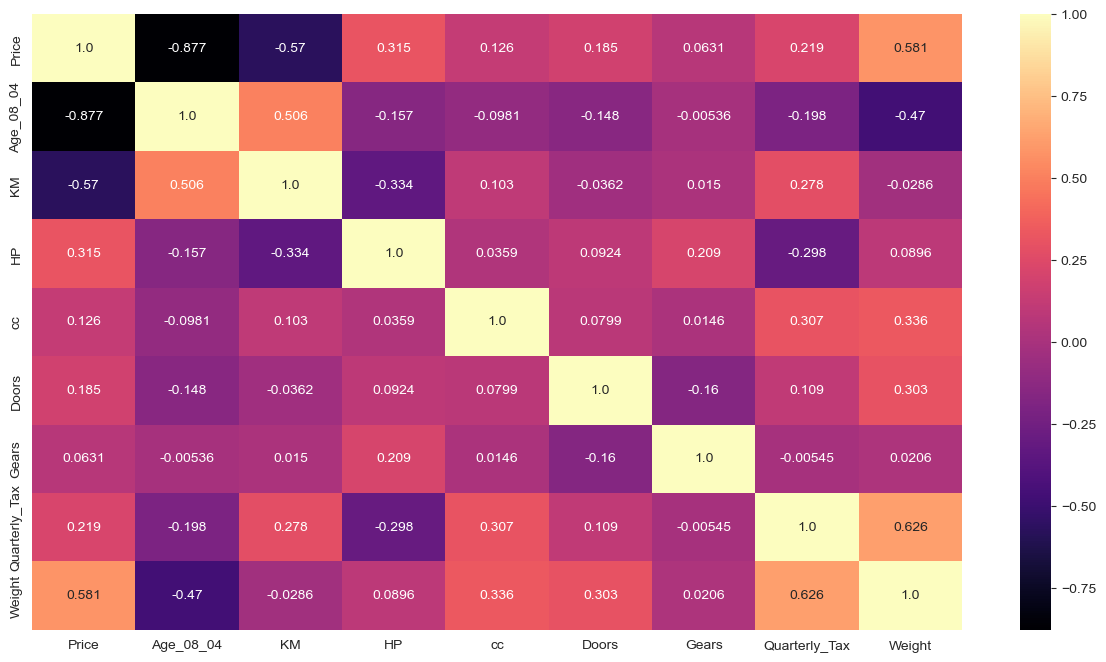

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(car.corr(), cmap='magma', annot=True, fmt=".3")
plt.show()
#Heatmap fmt=".no. of decimals" 


# Graphs

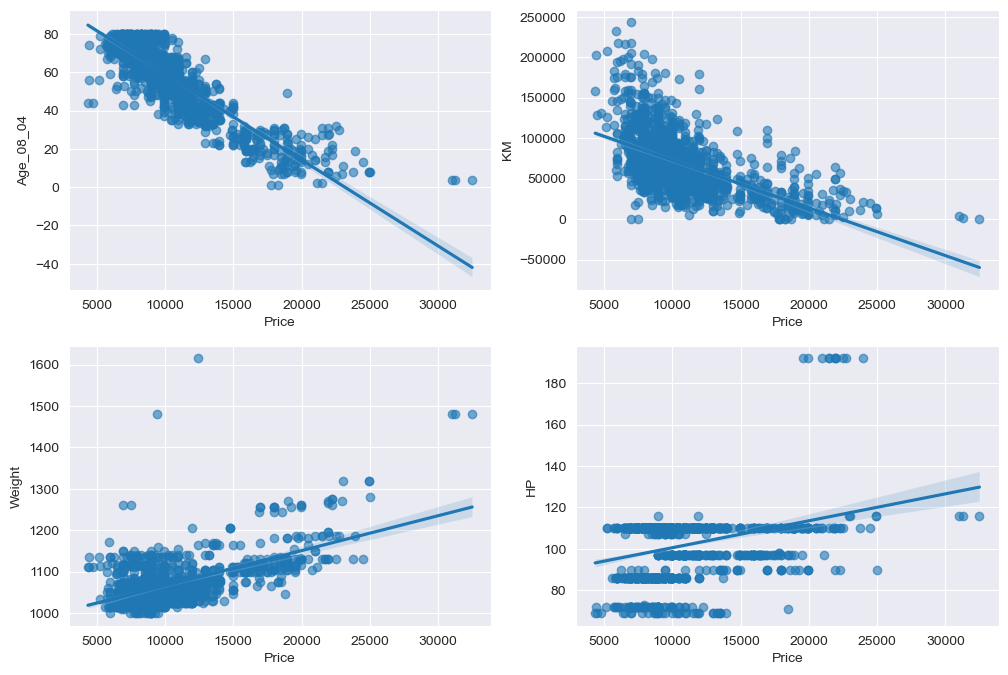

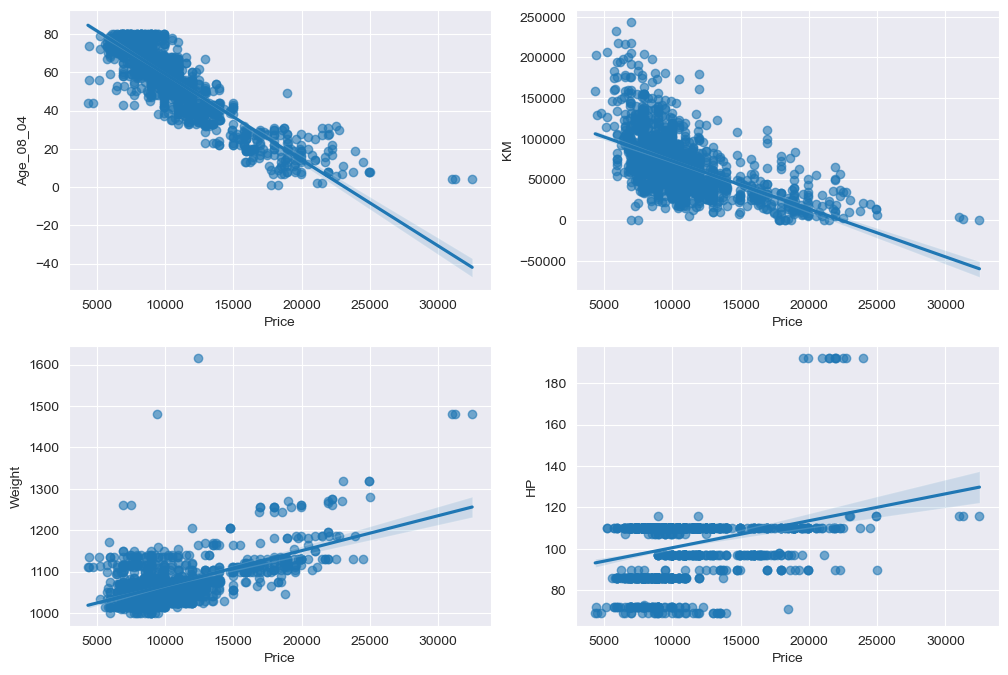

In [28]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age_08_04', data = car, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Price', y = 'KM', data = car, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Price', y = 'Weight', data = car, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.regplot(x = 'Price', y = 'HP', data = car, scatter_kws={'alpha':0.6}, ax = axes[1,1])
plt.show()

In [29]:
#f, axes = plt.subplots(1,2,figsize=(14,4))

#sns.distplot(car['KM'], ax = axes[0])
#sns.scatterplot(x = 'Price', y = 'KM', data = car, ax = axes[1])

In [30]:
#from collections import Counter
#fuel_list= Counter(car['Gears'])

#f, axes = plt.subplots(1,2,figsize=(14,4))

#sns.countplot(car['Gears'], ax = axes[0], palette="Set1")
#sns.violinplot(x = 'Gears', y = 'Price', data = car, ax = axes[1])


In [31]:
#f, axes = plt.subplots(1,2,figsize=(14,4))

#sns.distplot(car['HP'], ax = axes[0])
#sns.scatterplot(x = 'HP', y = 'Price', data = car, ax = axes[1])

In [32]:
#f, axes = plt.subplots(1,2,figsize=(14,4))

#sns.distplot(car['Doors'], ax = axes[0])
#sns.boxenplot(x = 'Doors', y = 'Price', data = car, ax = axes[1])

# Pandas Profiling & Sweetviz

In [33]:
#import pandas_profiling as pp
#import sweetviz as sv
#sweet_report = sv.analyze(car)
#sweet_report.show_html('Toyota_Report.html')

In [34]:
#EDA= pp.ProfileReport(car)
#EDA.to_file(output_file='Toyoto Corolla.html')

# Model Building

Using Sklearn

In [35]:
X = car.drop('Price', axis = 1).values
y = car.iloc[:, 0].values.reshape(-1,1)
X

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [36]:
y

array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]], dtype=int64)

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [38]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077, 1)
Shape of y_test: (359, 1)


In [39]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)


CV:  0.771963813821841
R2_score (train):  0.8640307618150082
R2_score (test):  0.8614722799605136
RMSE:  1402.0810748973886


In [41]:
regressor_linear.rank_

8

In [42]:
regressor_linear.coef_

array([[-1.21320641e+02, -2.01353093e-02,  2.95093022e+01,
        -7.75554068e-02,  2.06641923e+01,  5.83104153e+02,
         1.83035074e+00,  1.78505581e+01]])

In [43]:
regressor_linear.intercept_

array([-6263.01172068])

In [44]:
#Price prediction
car_new=pd.DataFrame({"Age_08_04":32,"KM":38500, "HP":78,"cc":1500,"Doors":3,"Gears":5,"Quarterly_Tax":200,"Weight":1200 },index=[1]) 
regressor_linear.predict(car_new)
print("The price will be:",regressor_linear.predict(car_new))

The price will be: [[16029.16408435]]


# Using stats.ols

In [45]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = car).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:28:52   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [46]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_age = 1/(1-rsq_age) # 1.88

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_km = 1/(1-rsq_km) #  1.76

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_hp = 1/(1-rsq_hp) #  1.42

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_cc = 1/(1-rsq_cc) # 1.16

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_doors = 1/(1-rsq_doors) #  1.16

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=car).fit().rsquared  
vif_gears = 1/(1-rsq_gears) #  1.1

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=car).fit().rsquared  
vif_tax = 1/(1-rsq_tax) #  2.31

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=car).fit().rsquared  
vif_weight = 1/(1-rsq_weight) #  2.52

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


# Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

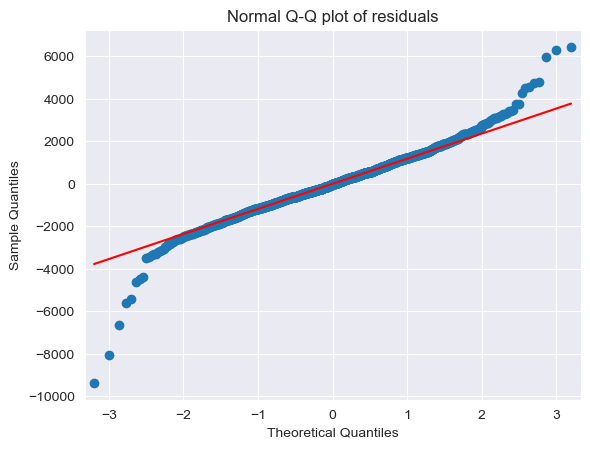

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [49]:
def a( vals ):
    return (vals - vals.mean())/vals.std()

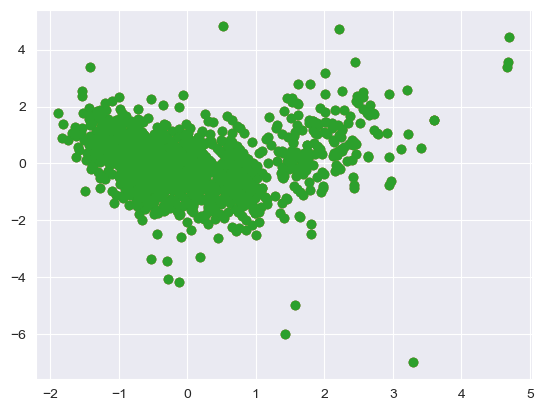

In [52]:
plt.scatter(a(model.fittedvalues),
           a(model.resid))
plt.show()

# Residual Vs Regressors

eval_env: 1


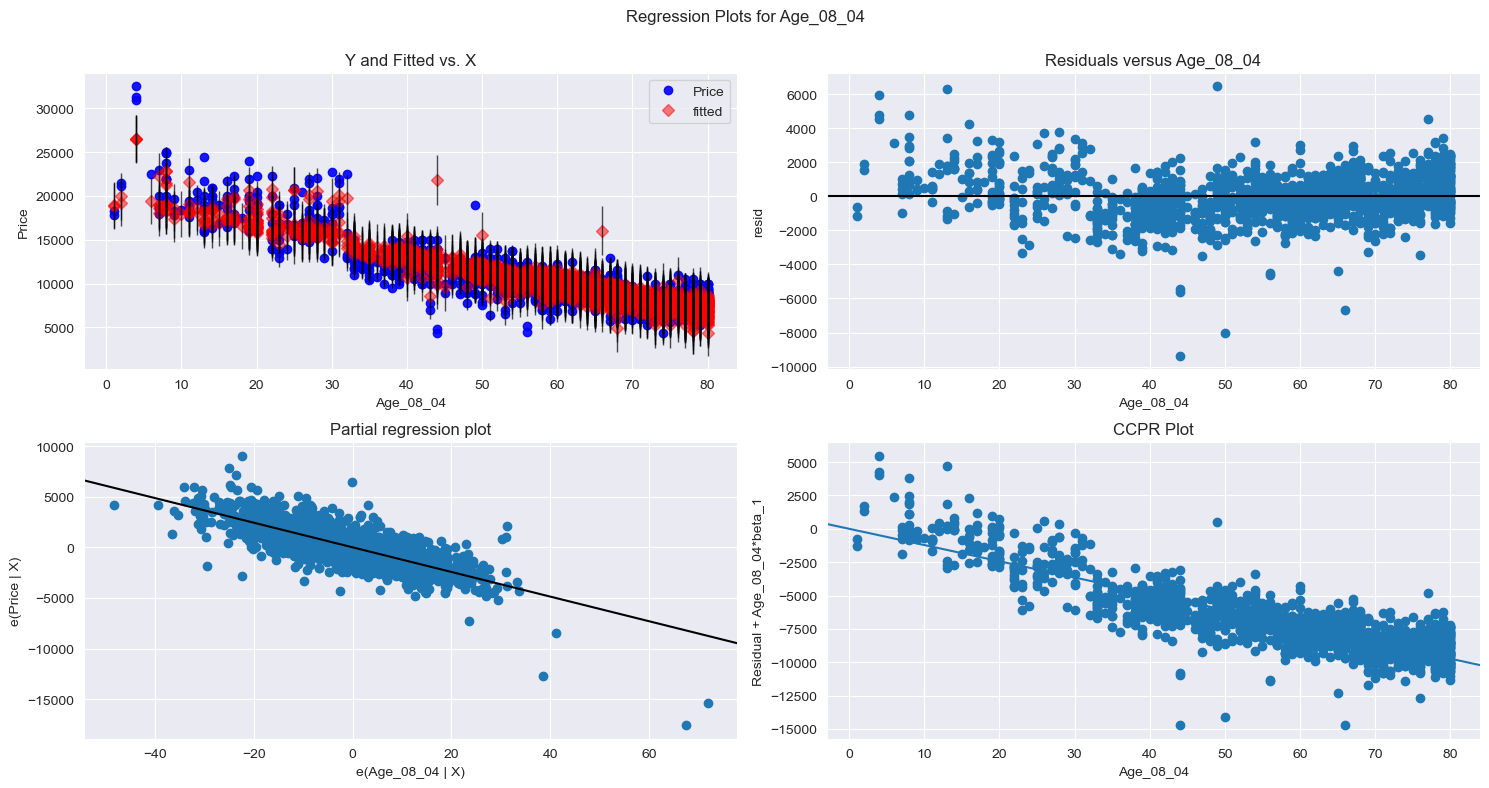

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


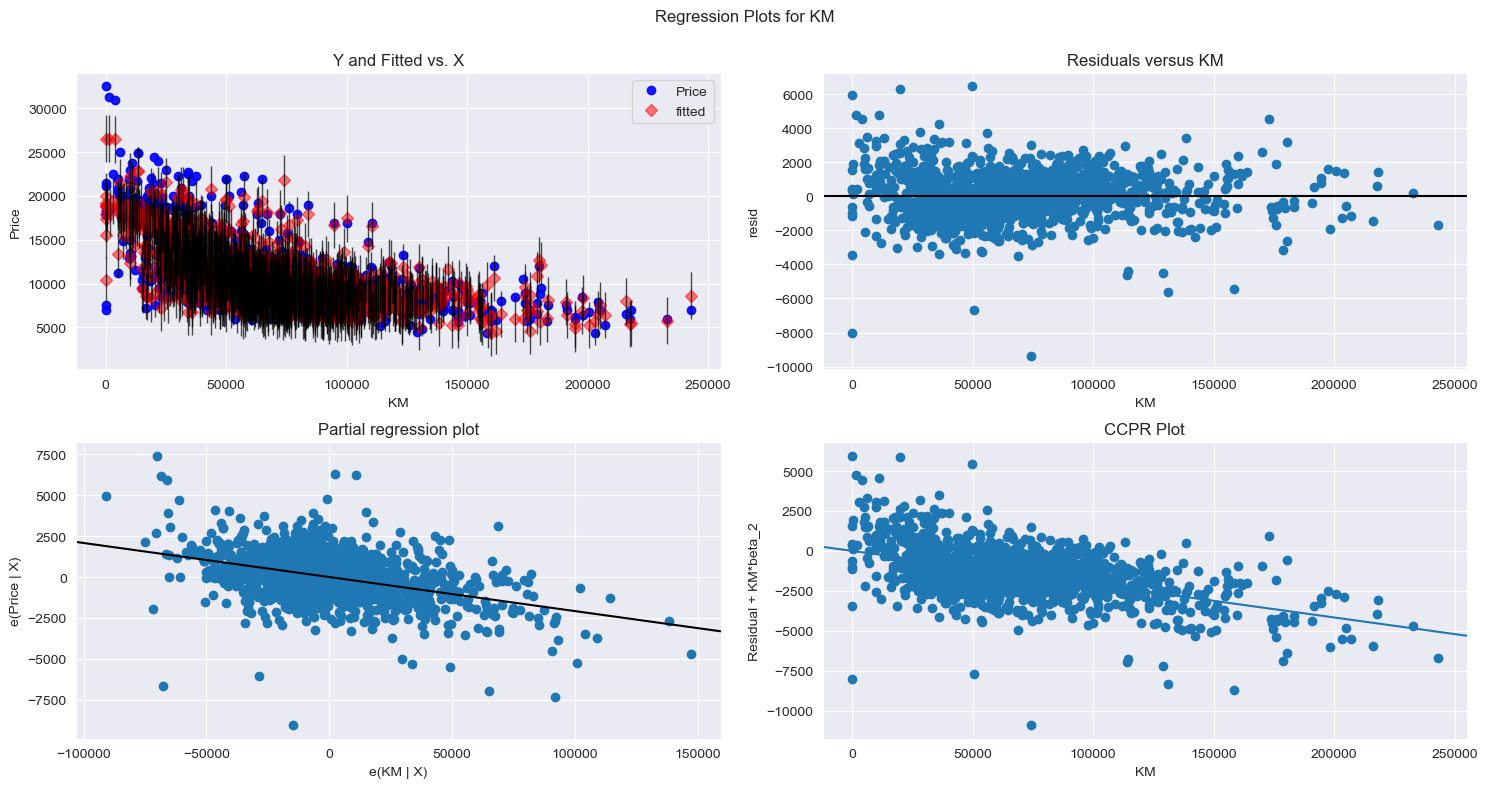

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


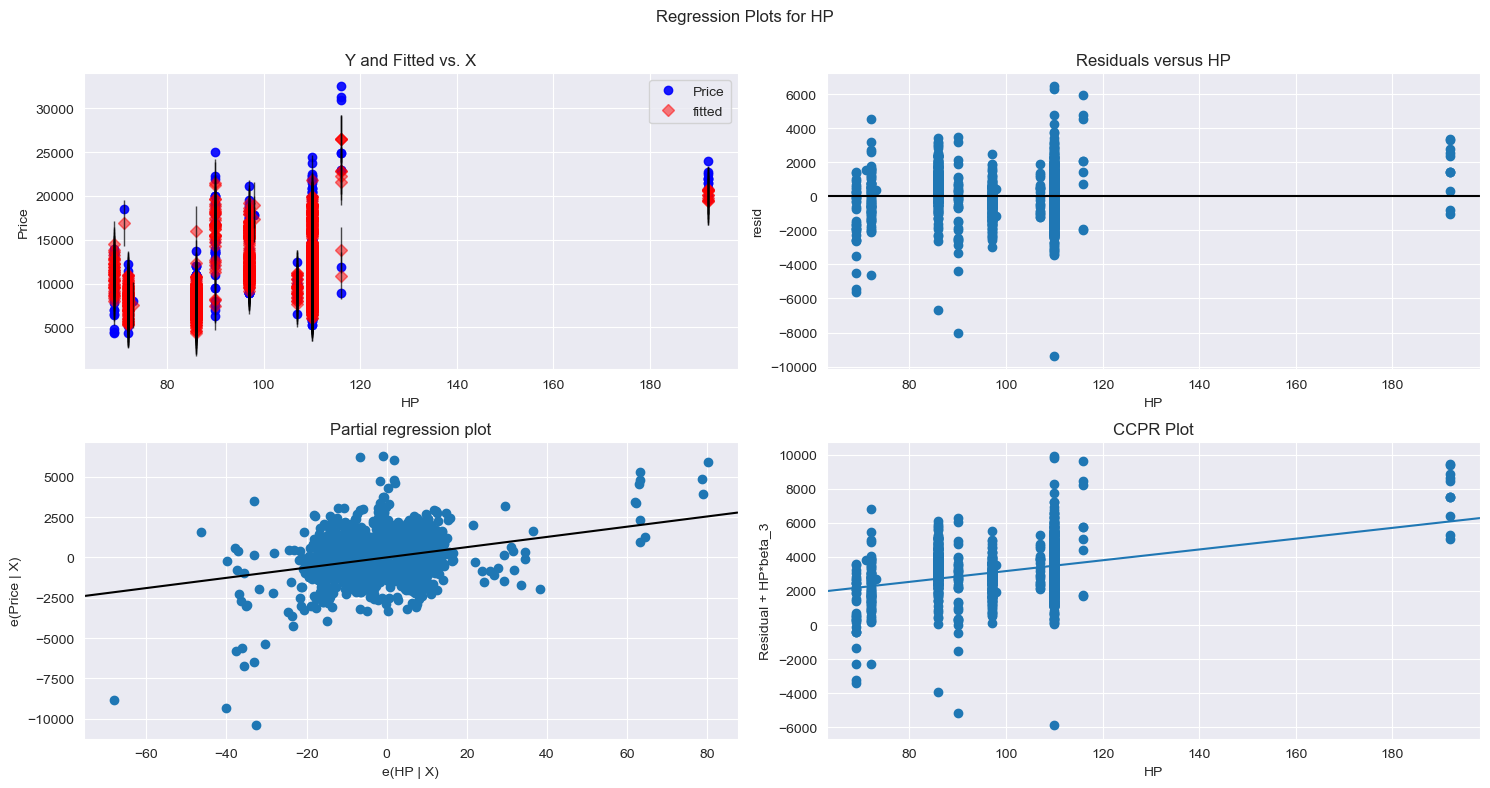

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


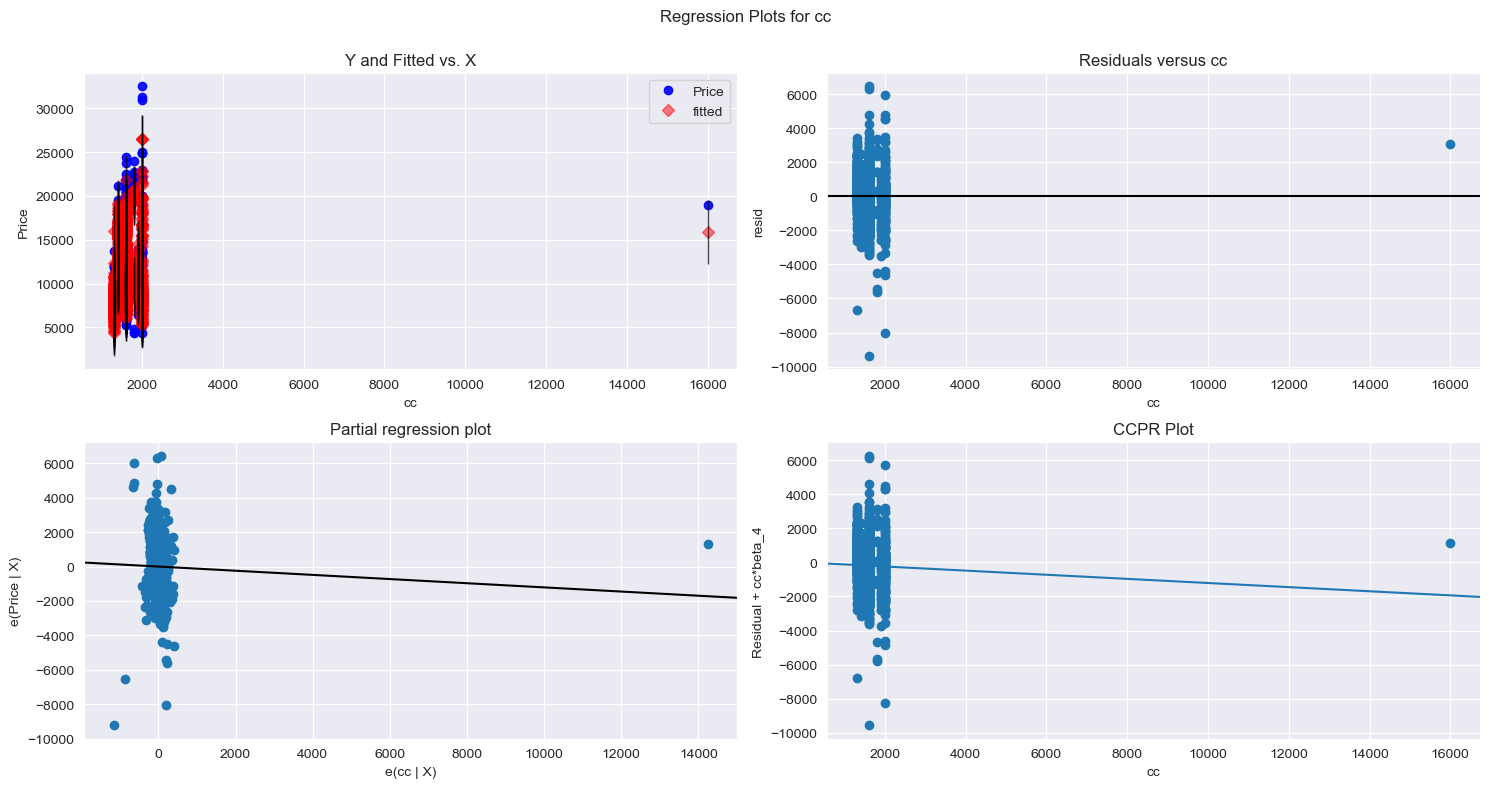

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


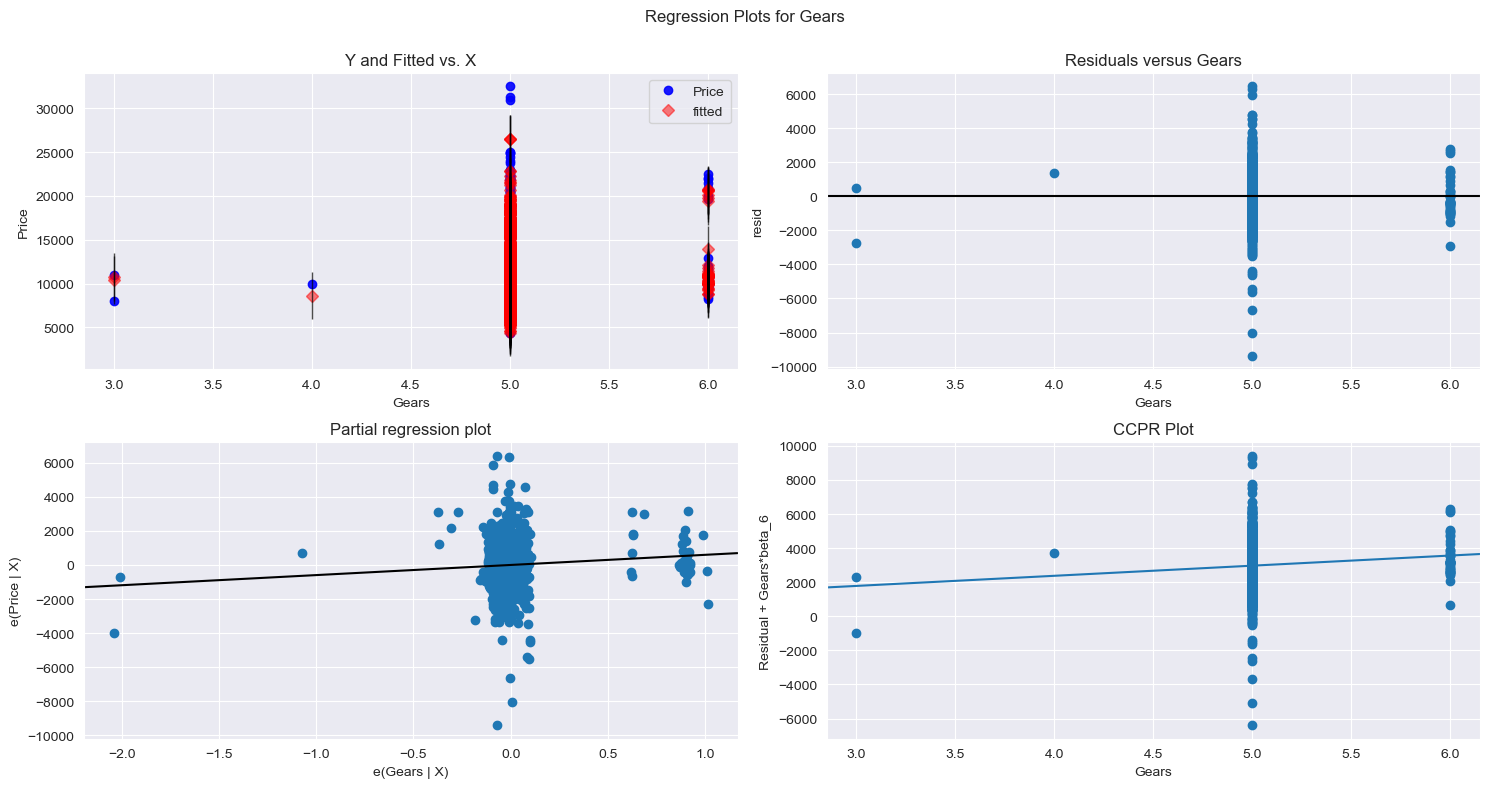

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


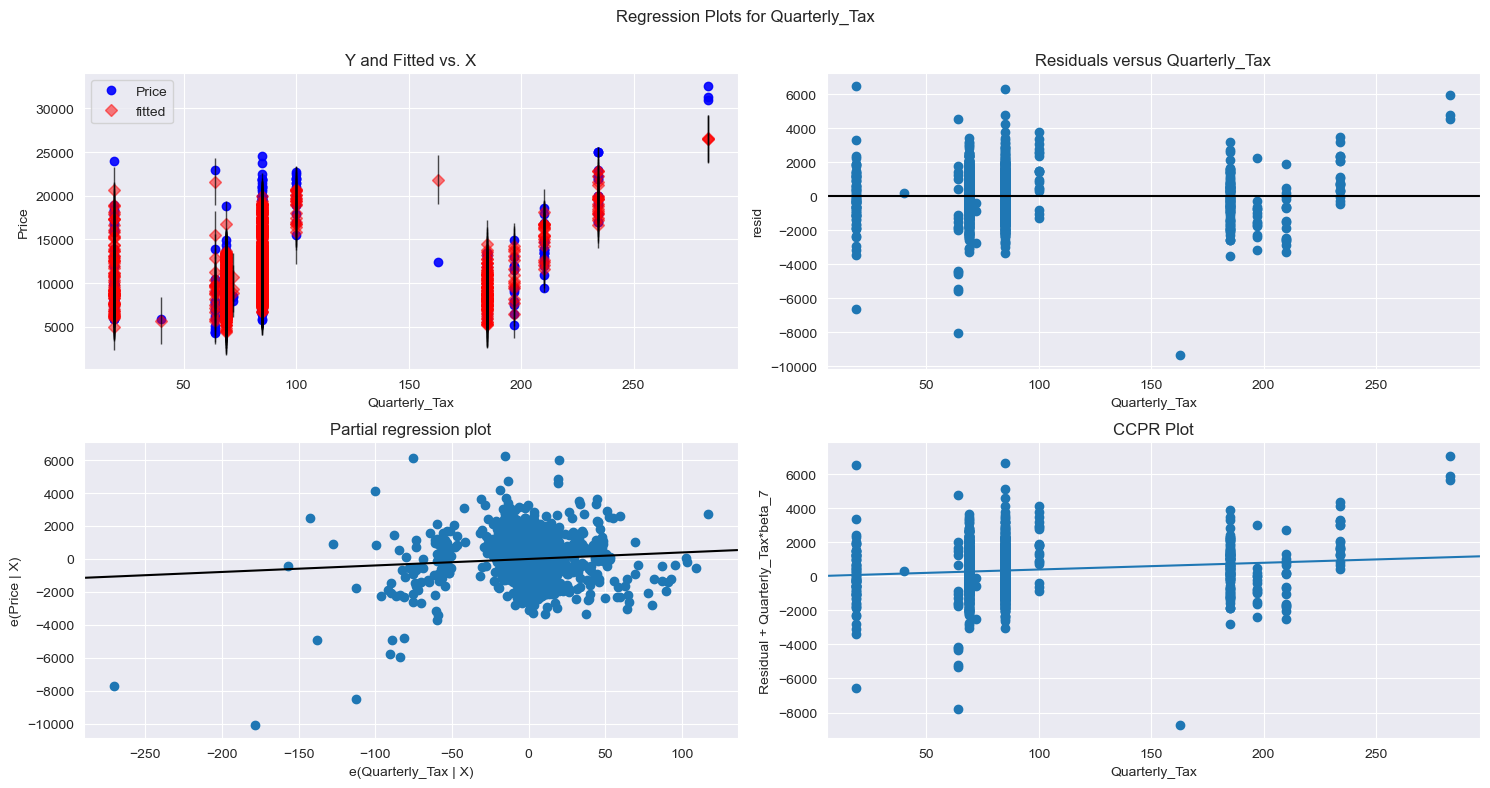

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


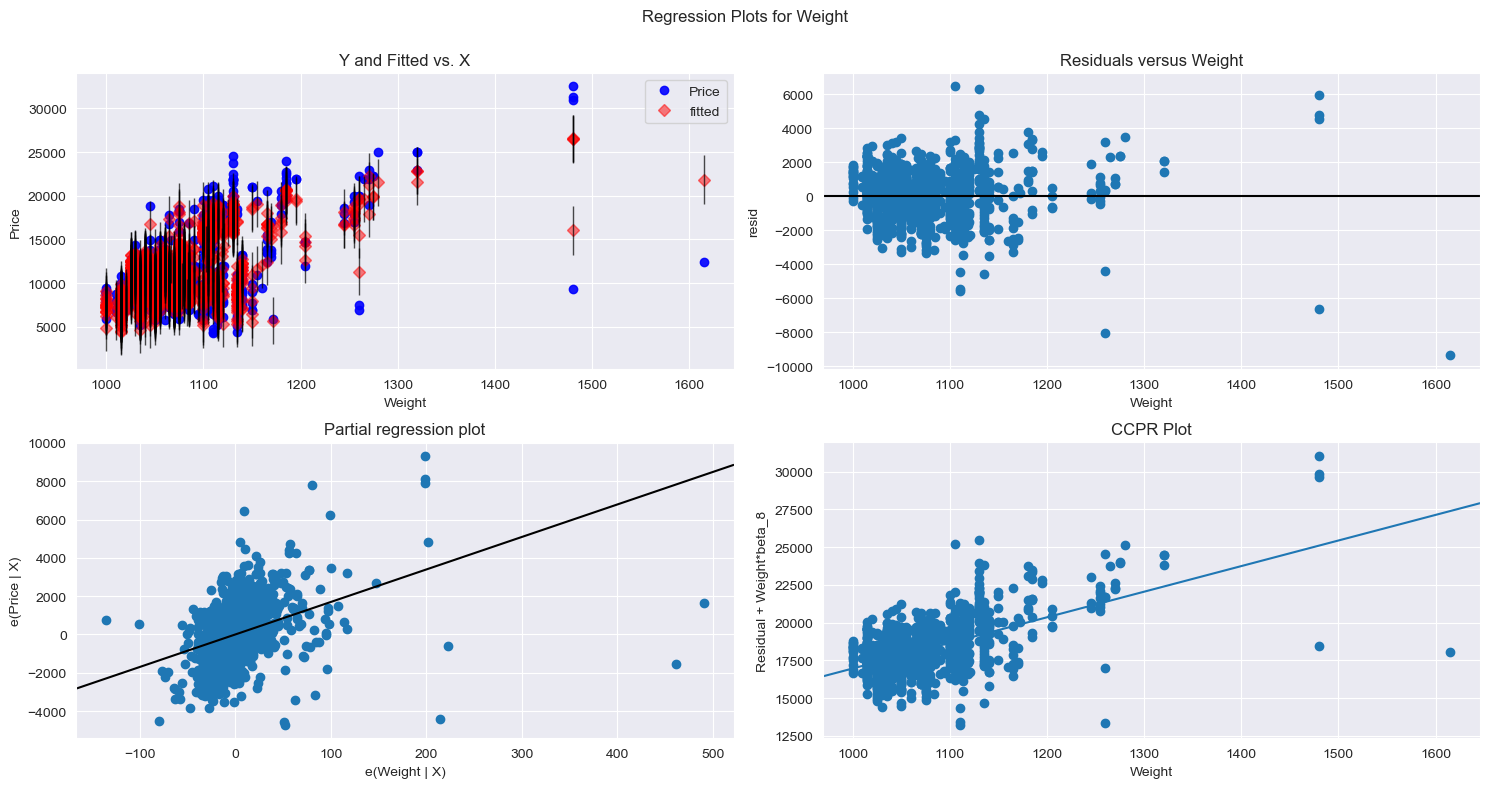

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/Outliers

Cook’s Distance

In [60]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

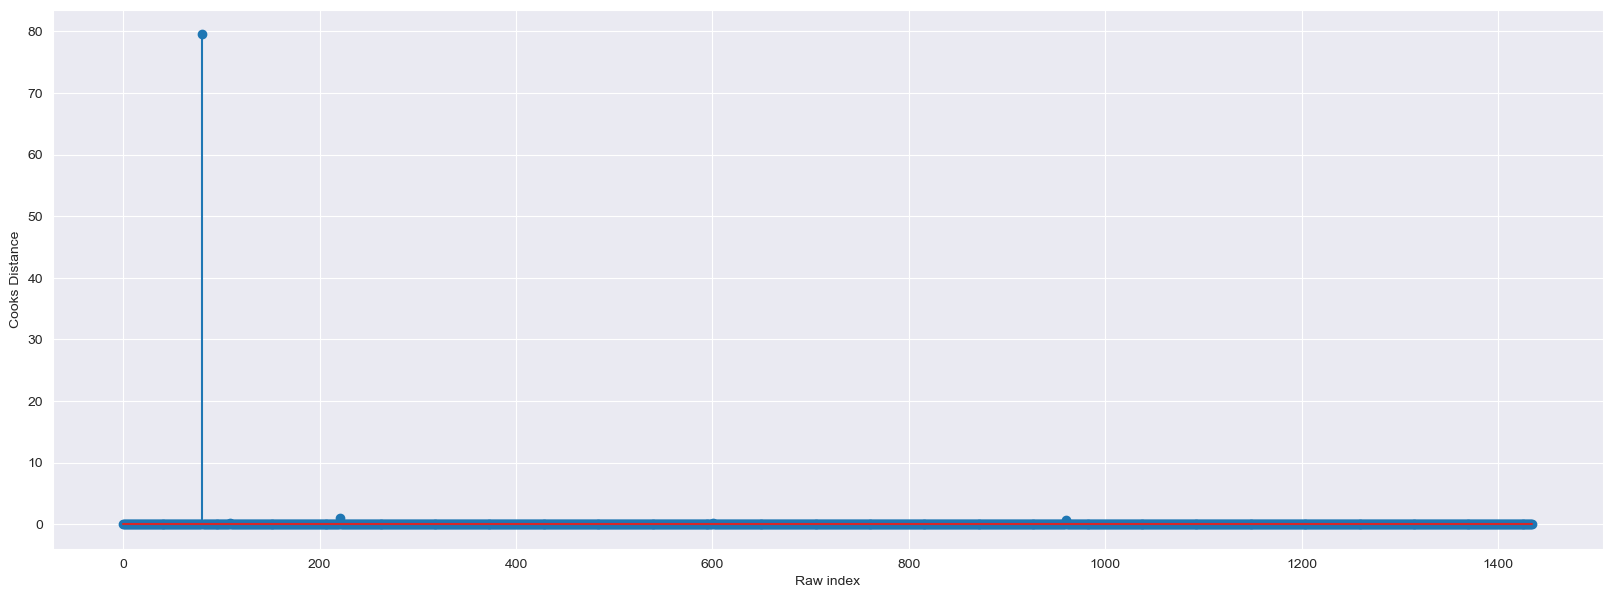

In [61]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car)), np.round(c, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624143546)

# High Influence points

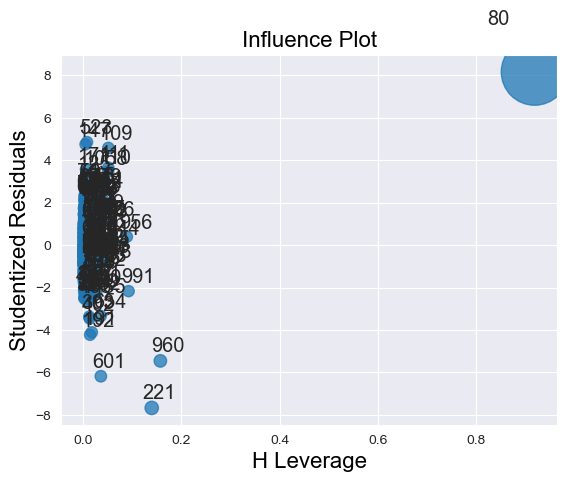

In [64]:
influence_plot(model)
plt.show()

From the above plot, it is evident that data point 80 are the influencers

In [65]:
#See the differences in HP and other variable values
car.head(82)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
77,18450,27,23489,110,1600,5,5,85,1115
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [66]:
car1=car.drop(car.index[[80]],axis=0).reset_index()
car1=car1.drop(['index'],axis=1)              #Drop the original index
car1.head(83)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
78,16895,29,22575,110,1600,5,5,85,1115
79,14900,30,22000,97,1400,5,5,85,1110
80,17250,29,20000,110,1600,5,5,85,1115
81,15450,25,17003,97,1400,5,5,85,1110


In [67]:
model1 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = car1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:58:08   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model1_influence = model1.get_influence()
(c1, _) = model1_influence.cooks_distance

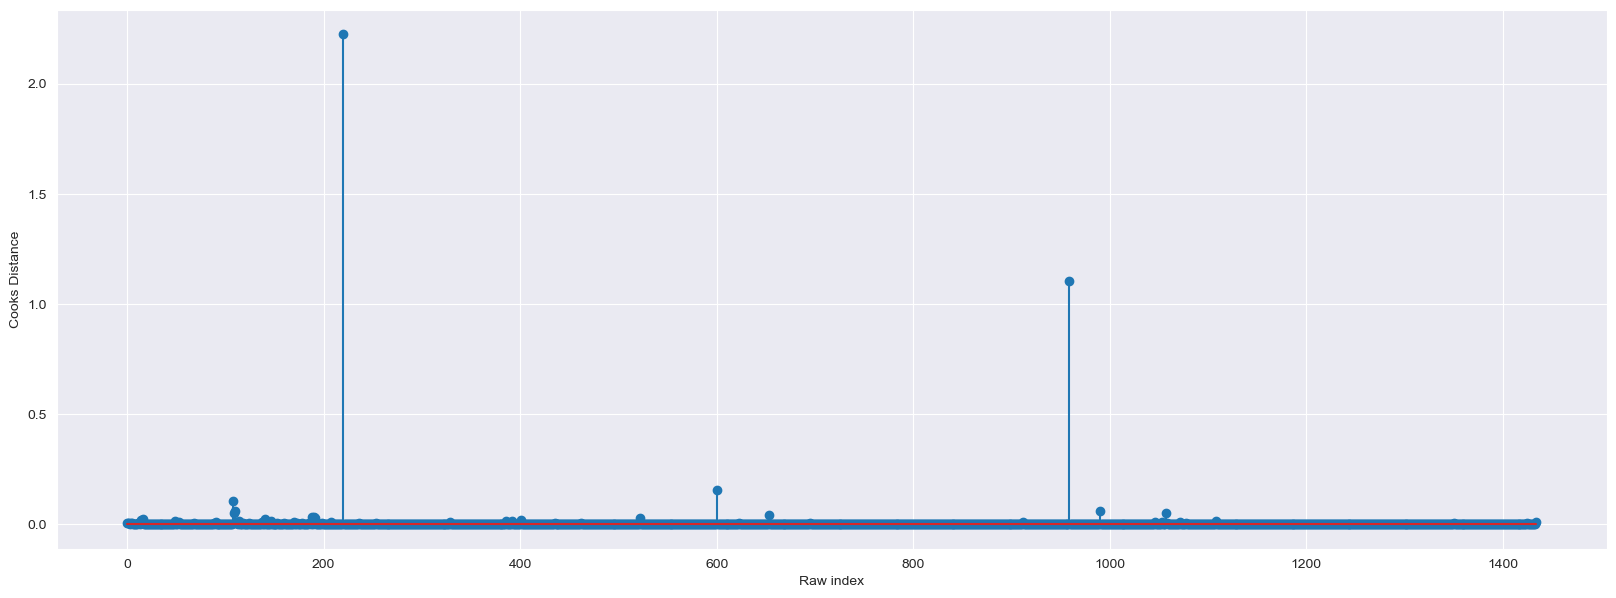

In [69]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car1)), np.round(c1, 3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
#index and value of influencer where c is more than .5
(np.argmax(c1),np.max(c1))

(220, 2.224461171300866)

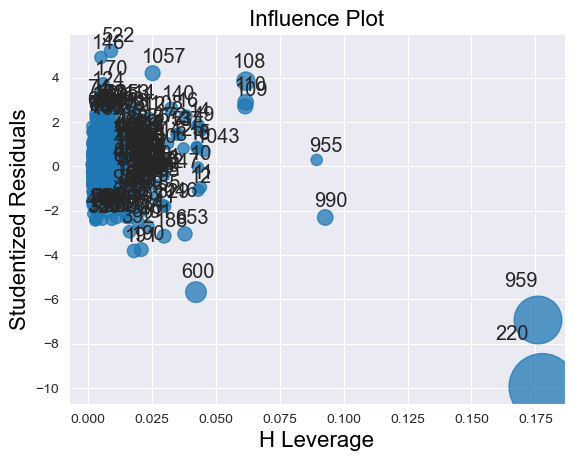

In [71]:
influence_plot(model1)
plt.show()